## Modern CNN

### AlexNet 
(기본적인 성능향상을 위한 틀)
- gpu 성능 때문에 2개의 GPU로 나눠서 사용
- ReLu 사용
- 데이터 증강
- 드롭아웃 사용
- 11X11, 5x5, 3x3활용

### VGG
(3x3의 중요성)
- 3x3 만 활용
- 1x1 convolution 사용 (파라미터를 줄이는 의미는 없음)
- 드롭아웃
- 16/19개 layer

#### 왜 3x3을 사용했을까
- conv의 크기가 커지면 conv가 한번 찍었을 때 들어가는 input의 크기가 커지게 됨 
- receptive field : 하나의 conv필터에 고려되는 input의 Dimension


- 3x3 conv 2번 receptive field = 5x5 eceptive field
- 파라미터는 3x3을 2번 사용하는것이 더 작다

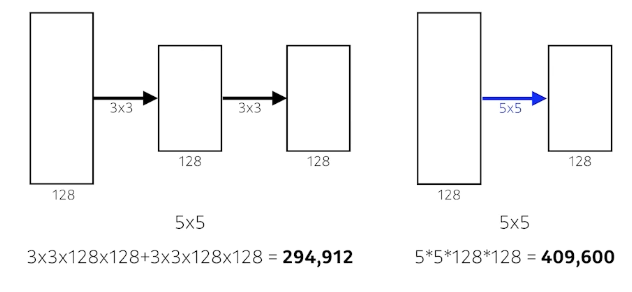

### GoogLeNet
(1x1의 중요성)
- 22 layer
- 비슷한 네트워크의 반복(NIN구조_Network in Network)
- inception block 활용
    - 1x1conv로 인해 파라미터 수를 줄여줌
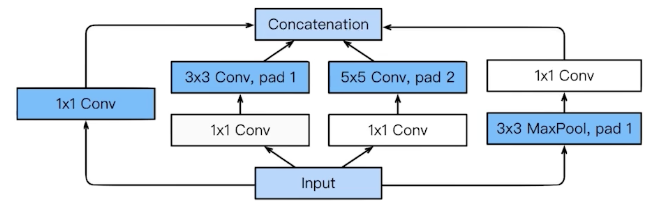

#### 1x1 convolution
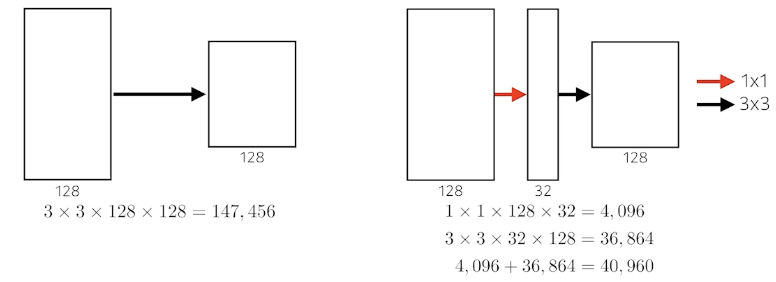
- 사용 이유 
    - 채널을 줄임
    - conv를 깊게 쌓으면서 parameter의 수를 줄일 수 있음

### ResNet
(Net를 더 깊게 쌓을 수 있는 가능성)
- identity map 추가 : 출력으로 나온 값을 1단짜리 conv에 더해줌
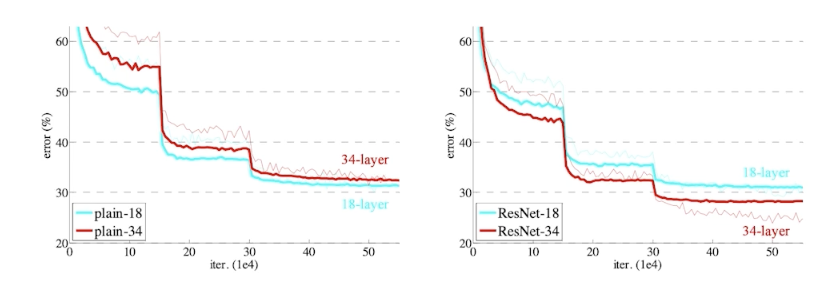
- resnet을 사용하면 layer을 더 깊게 쌓으면 더 좋은 성능을 냄
- 배치정규화가 conv 다음에 일어남


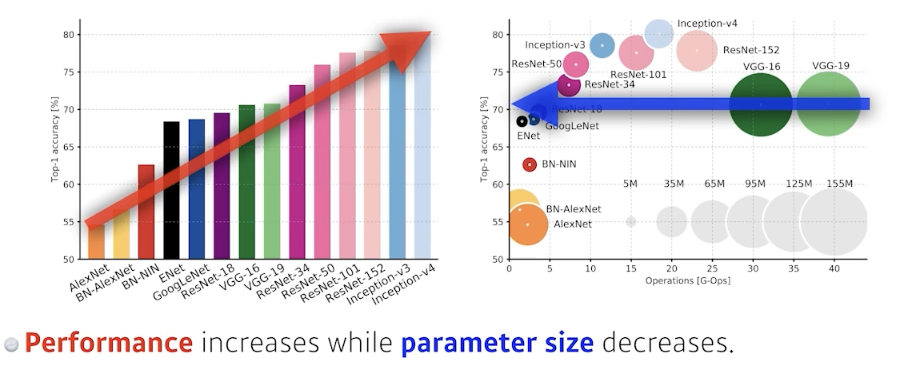
layer은 점점 깊어지지만 parameter의 수는 점점 줄어들게됨

### DenseNet
- ResNet은 conv를 통해서 나오는 어떤 값을 더해서 사용
- DenseNet은 더해서 값을 섞지 않고 concatenation 
- concatenation을 하면 채널이 기하급수적으로 증가 -> 파라미터도 늘어남
- 따라서 중간에 1번씩 채널을 줄여줘야함 : 1x1을 사용
- transition block : batchnorm -> 1x1 conv -> 2x2 avgpooling (feature map을 줄임)
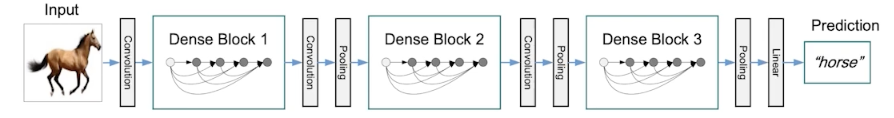

## Computer Vision Applications

## semantic segmentation
- 이미지를 픽셀마다 분류

### Fully Convolution Net
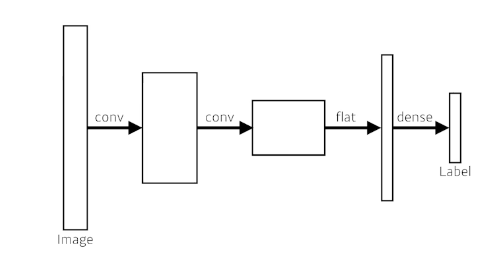
- 기존의 CNN
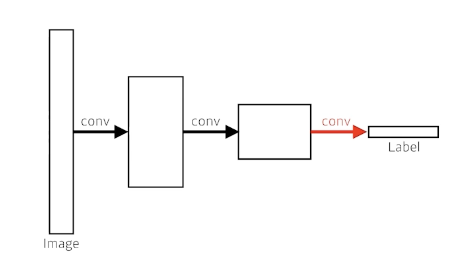
- Fully Convolution
- Denslayer을 없앰

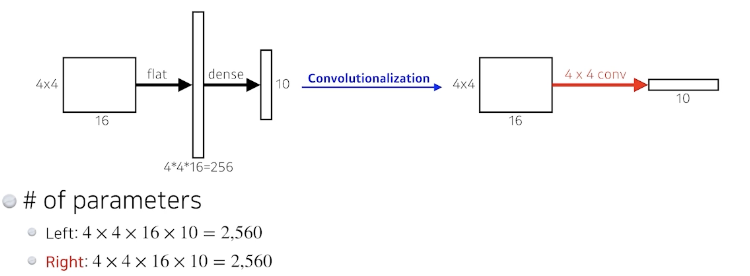
- Fully : 4x4x16의 layer에 4x4짜리 필터를 사용하고 출력을 10으로 하기 위해 10번 실행
- 파라미터의 수는 변하지 않음

### Deconvolution
- convolution의 역 연산과 같은 모습
- speacial demension을 키워주는 역할
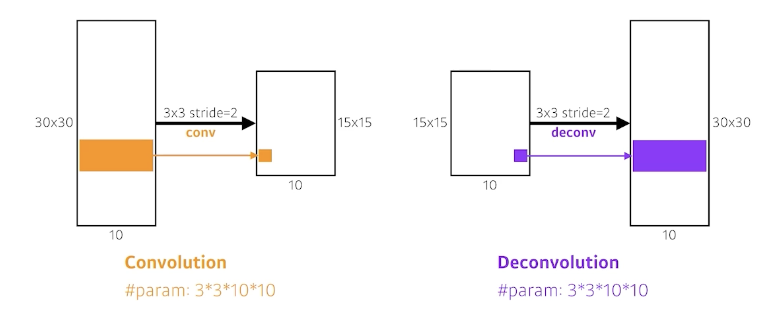

## Detection
- 바운딩박스

### R-CNN 
- 이미지에서 2000개의 region을 뽑아냄(무작위) -> 같은 크기로 변환 -> 분류(SVM), feature 뽑기(AlexNet) 

### SPPNet
- R-CNN의 가장 큰 문제 : 2000개의 region을 모두 cnn을 통과시켜야함, 시간이 많이 걸림
- 이미지안에서 cnn을 1회만 진행
- 이미지 안에서 바운딩박스를 뽑고 이미지 전체에 대해서 conv feature map을 만든 후 뽑힘 바운딩 박스에 해당하는 tensor만 가져와서 사용

### Fast R-CNN
- input 이미지에서 바운딩박스를 임의로 2000개정도 생성
- CNN을 1회 통과
- 각 region에 대해서 fixed length feature를 뽑음(ROI pooling)
- Neural net을 통해서 바운딩박스 regressor

### Faster R-CNN
- 바운딩 박스를 뽑아내는 region proposal도 학습을 하는 방향으로 = region proposal Network

#### region proposal Network
- anchor box : 미리 정해놓은 바운딩박스의 크기 
- anchor box를 미리 정해서 박수를 뽑음
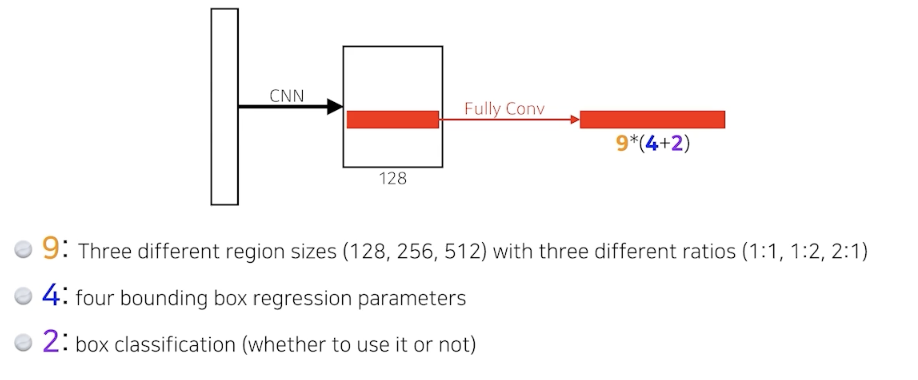

### YOLO
- 가장 빠르다
- region proposal Network를 통해서 분류를 하는게 아니라, 이미지자체에서 바로 분류를 하기 때문에 빠름
- 바운딩 박스를 미리 뽑아내는 스텝이 없음
- 바운딩 박스를 찾는것과 분류를 동시에 진행
- 이미지가 들어오면 이미지를 S x S grid로 나눔 -> 물체의 중앙이 해당 grid안에 들어가면 그 grid가 해당 물체에 대한 바운딩 박스와 물체가 무엇인지 분류 -> b 개의 바운딩박스를 예측 (x,y,w,h)를 찾아줌과 동시에 grid가 물체를 예측 -> 정보를 취함
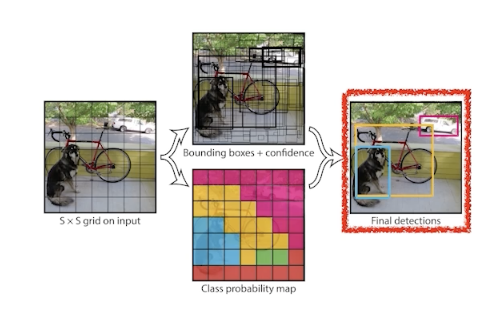